###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth, C.D. Cooper.

# Spreading out

Welcome back! This is the third lesson of the course [Module 4](https://github.com/numerical-mooc/numerical-mooc/tree/master/lessons/04_spreadout), _Spreading out: parabolic PDEs,_ where we study the numerical solution of diffusion problems.

In the first two notebooks, we looked at the 1D heat equation, and solved it numerically using [*explicit*](https://github.com/numerical-mooc/numerical-mooc/blob/master/lessons/04_spreadout/01_Heat_Equation_1D_Explicit.ipynb) and [*implicit*](https://github.com/numerical-mooc/numerical-mooc/blob/master/lessons/04_spreadout/02_Heat_Equation_1D_Implicit.ipynb) schemes. We learned that implicit schemes are unconditionally stable, and we are free to choose any time step. —Wait: _any time step?_ Remember, we still want to capture the physics of the problem accurately. So although stability concerns do not limit the time step, it still hast to be small enough to satisfy any accuracy concerns.

We are now ready to graduate to two dimensions! In the remaining lessons of this course module, we will study the 2D heat equation and reaction-diffusion equation. Like before, we start with explicit methods (this lesson) and then move to implicit methods (next lesson). Let's get started.

## 2D Heat conduction

The equation of heat conduction in 2D is:

\begin{equation}
\rho c_p \frac{\partial T}{\partial t} = \frac{\partial}{\partial x} \left( \kappa_x \frac{\partial T}{\partial x} \right) + \frac{\partial}{\partial y} \left(\kappa_y \frac{\partial T}{\partial y} \right)
\end{equation}

where $\rho$ is the density, $c_p$ is the heat capacity and $\kappa$ is the thermal conductivity.

If the thermal conductivity $\kappa$ is constant, then we can take it outside of the spatial derivative and the equation simplifies to:

\begin{equation}
\frac{\partial T}{\partial t} = \alpha \left(\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} \right)
\end{equation}

where $\alpha = \frac{\kappa}{\rho c_p}$ is the thermal diffusivity.  The thermal diffusivity describes the ability of a material to conduct heat vs. storing it.

Does that equation have a familiar look to it?  That's because it's the same as the diffusion equation.  There's a reason that $\alpha$ is called the thermal *diffusivity*! We're going to set up a interesting problem where 2D heat conduction is important, and set about to solve it with explicit finite-difference methods.

### Problem statement

Removing heat out of micro-chips is a big problem in the computer industry. We are at a point in technology where computers can't run much faster because the chips might start failing due to the high temperature. This is a big deal! Let's study the problem more closely.

We want to understand how heat is dissipated from the chip with a very simplified model. Say we consider the chip as a 2D plate of size $1{\rm cm}\times 1{\rm cm}$, made of Silicon: $\kappa = 159{\rm W/m C}$, $c_p = 0.712\cdot 10^3 {\rm J/kg C}$, $\rho = 2329{\rm kg/m}^3$, and diffusivity $\alpha \approx 10^{-4}{\rm m}^2{/rm s}$. Silicon melts at $1414{\rm C}$, but chips should of course operate at much smaller temperatures. The maximum temperature allowed depends on the processor make and model; in many cases, the maximum temperature is somewhere between $60{\rm C}$ and $\sim70{\rm C}$, but better CPUs are recommended to operate at a [maximum of $80{\rm C}$](http://www.pugetsystems.com/blog/2009/02/26/intel-core-i7-temperatures/) (like the Intel Core i7, for example).

We're going to set up a somewhat artificial problem, just to demonstrate an interesting numerical solution. Say the chip is in a position where on two edges (top and right) it is in contact with insulating material.  On the other two edges the chip is touching other components that have a constant temperature of $T=100{\rm C}$ when the machine is operating. Initially, the chip is at room temperature $(20{\rm C})$. *How long does it take for the center of the chip to reach $70{\rm C}$?*

<img src='./figures/2dchip.svg' width='400px'>

####Figure 1: Simplified microchip problem setup.

Let's use what we have learned to tackle this problem!

## 2D Finite differences

Everything you learned about finite-difference schemes in [Notebook 1 of Module 2](http://nbviewer.ipython.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/02_spacetime/02_01_1DConvection.ipynb) still applies, but now there are two spatial dimensions.  We will need to build a 2D grid of discrete points to compute the solution on. 

We will use a 2D Cartesian grid: one that consists of two families of (grid) lines parallel to the two spatial directions. Two lines (of different families) intersect on one and only one grid node (this is called a _structured_ grid). In the $x$ direction, the discretization uses $i=0, \cdots N_x$ lines, and in the $y$ direction we have $j=0, \cdots N_y$ lines. A given node on the grid will now have two spatial coordinates, and we need two indices: for the two lines that intersect at that node.  For example, the middle point in the figure below would be $T_{i,j}$.

<img src="./figures/2dgrid.svg">

#### Figure 2. Nodal coordinates in 2 dimensions

### Explicit scheme in 2D

Recall from above that the 2D heat equation is 

$$\frac{\partial T}{\partial t} = \alpha \left(\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} \right)$$

Let's write this out discretized using forward difference in time, and central difference in space,  using an explicit scheme. You should be able write this out yourself, without looking—if you need to look, it means you still need to write more difference equations by your own hand!

\begin{equation}
\frac{T^{n+1}_{i,j} - T^n_{i,j}}{\Delta t} = \alpha \left( \frac{T^n_{i+1, j} - 2T^n_{i,j} + T^n_{i-1,j}}{\Delta x^2} + \frac{T^n_{i, j+1} - 2T^n_{i,j} + T^n_{i,j-1}}{\Delta y^2}\right)
\end{equation}

Rearranging the equation to solve for the value at the next time step, $T^{n+1}_{i,j}$, yields

\begin{equation}
T^{n+1}_{i,j}= T^n_{i,j} + \alpha \left( \frac{\Delta t}{\Delta x^2} (T^n_{i+1, j} - 2T^n_{i,j} + T^n_{i-1,j}) + \frac{\Delta t}{\Delta y^2} (T^n_{i, j+1} - 2T^n_{i,j} + T^n_{i,j-1})\right)
\end{equation}

That's a little messier than 1D, but still recognizable.  

Up until now, we've used stencils to help visualize how a scheme will advance the solution for one timestep.  Stencils in 2D are a little harder to draw, but hopefully the figure below will guide your understanding of this method: we are using five grid points at time step $n$ to obtain the solution on one point at time step $n+1$.

<img src="./figures/2d_stencil.svg">

####Figure 3: 2D Explicit Stencil

Similar to all of the 1D explicit methods we've used, the solution at $T^{n+1}_{i,j}$ is updated using only known values from the current solution at time $n$. This is straightforward to implement in code, but will be subject to stability limitations on the time step that you can choose. We'll study an implicit method in the next lesson.

### Boundary Conditions

Whenever we reach a point that interacts with the boundary, we apply the boundary condition. As in the previous notebook, if the boundary has Dirichlet conditions, we simply impose the prescribed temperature at that point. If the boundary has Neumann conditions, we approximate them with a finite-difference scheme.

Remember, Neumann boundary conditions prescribe the derivative in the normal direction. For example, in the problem described above, we have $\frac{\partial T}{\partial y} = q_y$ in the top boundary and $\frac{\partial T}{\partial x} = q_x$ in the right boundary, with $q_y = q_x = 0$ (insulation).

Thus, at every time step, we need to enforce

\begin{equation}
T_{i,end} = q_y\cdot\Delta y + T_{i,end-1}
\end{equation}

and

\begin{equation}
T_{end,j} = q_x\cdot\Delta x + T_{end-1,j}
\end{equation}

Write the finite-difference discretization of the boundary conditions yourself, and confirm that you can get the expressions above.

### Stability

Before doing any coding, let's revisit stability constraints. We saw in the first notebook of this series that the 1D explicit discretization of the diffusion equation was stable as long as $\alpha \frac{\Delta t}{(\Delta x)^2} \leq \frac{1}{2}$. In 2D, this constraint is even tighter, as we need to add them in both directions:

\begin{equation}
\alpha \frac{\Delta t}{(\Delta x)^2} + \alpha \frac{\Delta t}{(\Delta y)^2} < \frac{1}{2}.
\end{equation}

Say that the mesh has the same spacing in $x$ and $y$, $\Delta x = \Delta y = \delta$. In that case, the stability condition is:

\begin{equation}
\alpha \frac{\Delta t}{\delta^2} < \frac{1}{4}
\end{equation}

## Code implementation

### Array storage

The physical problem has two dimensions, so we also store the temperatures in two dimensions: in a 2D array. 

We chose to store it with the $y$ coordinates corresponding to the rows of the array and $x$ coordinates varying with the columns (this is just a code design decision!). If we are consistent with the stencil formula (with $x$ corresponding to index $i$ and $y$ to index $j$), then $T_{i,j}$ will be stored in array format as `T[j,i]`.

This might be a little confusing as most of us are used to writing coordinates in the format $(x,y)$, but our preference is to have the data stored so that it matches the physical orientation of the problem. Then, when we make a plot of the solution, the visualization will make sense to us, with respect to the geometry of our set-up. That's just nicer than to have the plot rotated!

<img src="./figures/rowcolumn.svg" width="400px">

####Figure 4: Row-column data storage

As you can see on Figure 4 above, if we want to access the value $18$ we would write those coordinates as $(x_2, y_3)$.  You can also see that its location is the 3rd row, 2nd column, so its array address would be `T[3,2]`.

Again, this is a design decision.  However you can choose to manipulate and store your data however you like; just remember to be consistent!

### Code time!

Now, to some coding! First, we have a little function that will advance the solution in time with a forward-time, centered-space scheme, and will monitor the center of the plate to tell us when it reaches $70{\rm C}$. Let's start by setting up our Python compute environment.

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
def ftcs(T, nt, alpha, dt, dx, dy):

    j_mid = (numpy.shape(T)[0])/2
    i_mid = (numpy.shape(T)[1])/2
    
    for n in range(nt):
        Tn = T.copy()
        T[1:-1,1:-1] = Tn[1:-1,1:-1] + alpha *\
            (dt/dy**2 * (Tn[2:,1:-1] - 2*Tn[1:-1,1:-1] + Tn[:-2,1:-1]) +\
             dt/dx**2 * (Tn[1:-1,2:] - 2*Tn[1:-1,1:-1] + Tn[1:-1,:-2]))
  
        # Enforce Neumann BCs
        T[-1,:] = T[-2,:]
        T[:,-1] = T[:,-2]
        
        # Check if we reached T=70C
        if T[j_mid, i_mid] >= 70:
            print ("Center of plate reached 70C at time {0:.2f}s.".format(dt*n))
            break
        
    if T[j_mid, i_mid]<70:
        print ("Center has not reached 70C yet, it is only {0:.2f}C.".format(T[j_mid, i_mid]))
        
    return T

See the [`break`](https://docs.python.org/2/tutorial/controlflow.html) statement? It exits the `for` loop at the closest time iteration when the plate reaches $70{\rm C}$.

In the code cell below, we define our initial conditions according to the problem set up, and choose the discretization parameters. We start with only 20 spatial steps in each coordinate direction and advance for 500 time steps. You should later experiments with these parameters at your leisure!

In [3]:
L = 1.0e-2
H = 1.0e-2

nx = 21
ny = 21
nt = 500

dx = L/(nx-1)
dy = H/(ny-1)

x = numpy.linspace(0,L,nx)
y = numpy.linspace(0,H,ny)

alpha = 1e-4

Ti = numpy.ones((ny, nx))*20
Ti[0,:]= 100
Ti[:,0] = 100

We don't want our solution blowing up, so let's find a time step with $\frac{\alpha \Delta t}{\Delta x^2} = \frac{\alpha \Delta t}{\Delta y^2} = \frac{1}{4}$. 

In [4]:
sigma = 0.25
dt = sigma * min(dx, dy)**2 / alpha
T=Ti.copy()
T = ftcs(T, nt, alpha, dt, dx, dy)

Center of plate reached 70C at time 0.16s.


### Visualize the results

By now, you're no doubt *very* familiar with the `pyplot.plot` command.  It's great for line plots, scatter plots, etc., but what about when we have two spatial dimensions and another value (temperature) to display?  

Are you thinking contour plot?  We're thinking contour plot.  Check out the documentation on [`pyplot.contourf`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contour) (the 'f' denotes "filled" contours).

First, though, we need to create a `meshgrid` purely for plotting purposes:   [`numpy.meshgrid`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) is a function that takes two vectors (`x` and `y`, say) and returns two 2D arrays of $x$ and $y$ coordinates that we then use to create the contour plot.  

In [5]:
#my, mx = numpy.meshgrid(y,x)
mx, my = numpy.meshgrid(x,y)

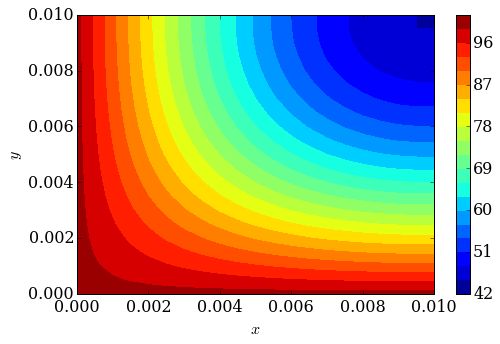

In [6]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(my,mx,T,20)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

That looks pretty cool!  Note that in the call to `pyplot.contourf` you can specify the number of contour levels to display (we chose 20).  Look at that visualization: does it make physical sense to you, considering that the upper and right sides of the chip are insulated, in our problem?

##### Dig deeper

In the problem we just demonstrated, the chip reaches a temperature of $70{\rm C}$ at a given time, but will it keep increasing? That spells trouble.

Imagine that you have a heat sink instead of an insulator acting on the upper and right sides. What should be the heat flux that the heat sink achieves there, so that the temperature does not exceed $70{\rm C}$ at the center of the chip?

---
###### The cell below loads the style of the notebook

In [7]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())